### <center>**Assignment**</center>

In this assignment, we would like to predict the success of shots made by basketball players in the NBA.

![](https://nthu-datalab.github.io/ml/labs/05_Regularization/fig-nba.png)

Please download the dataset first. You might need to try with various models to achieve better performance.

### **Requirements**

- Submit to eeclass with your code file `Lab05_{student_id}.ipynb` (e.g. `Lab05_109069999.ipynb`) and prediction file `Lab05_{student_id}_y_pred.csv`. The notebook should contain the following parts:

    1. Use all features to train [any linear model in scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#linear-models) and try different hyperparameters (ex. different degree, complexity). Show their performances.
    2. Select 1 setting (model + hyperparameters) and plot the **error curve** to show that the setting you selected **isn't over-fit**.
    3. Use any method to choose the **best 3 features** that can best aid the model's prediction. Explain **how you find it**.
        - Note: the combination of features doesn't count as 1 feature, e.g. $x_{1}$, $x_{2}$, and $x_1^2+x_2$ count as only two features.
    4. Train the model selected in 2. with the only 3 features selected in 3., and present the training error.
    5. Export the predictions of the model trained in 4. for ``X_test`` (follow the format of ``y_train.csv``).
    6. **A brief report** of what you have done in this assignment.

- Prediction performance will have minimal impact on the assignment grade, so there's no need to be overly concerned about it.
- Deadline: **2023-10-19 (Thur) 23:59**.

### **Hints**

1. You can **preprocess the data** to help your training.
2. Since you don't have y_test this time, you may need to **split a validation set** for checking your performance.
3. It is possible to use a regression model as a classifier, for example [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html).



### **References**

1. [Stanford CS229 Machine Learning](http://cs229.stanford.edu/proj2017/final-reports/5132133.pdf)
2. [NBA shot logs](https://www.kaggle.com/dansbecker/nba-shot-logs)


In [37]:
import pandas as pd
import numpy as np
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [38]:
# download the dataset
import urllib.request

# urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
# urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
# urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X = pd.read_csv('./data/X_train.csv')
y = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')

In [72]:
print(X.shape)
print(X.columns)
print(y.shape)
print(y.columns)

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
(85751, 1)
Index(['FGM'], dtype='object')


In [40]:
X.head()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9


In [41]:
print("Label with:", np.unique(y.values))

Label with: [0 1]


In [43]:
# Standardlize and Split data
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.2, random_state=0)

print("Train data:", X_train.shape)
print("Valid data:", X_valid.shape)

Train data: (68600, 8)
Valid data: (17151, 8)


### **All feature training in different hyper-parameters**

In [44]:
# Logistic regression
penalty = [None, 'l2']

for p in penalty:
    logistic = LogisticRegression(penalty=p, max_iter=500)

    logistic.fit(X_train, y_train.values.ravel())

    y_train_pred = logistic.predict(X_train)
    y_valid_pred = logistic.predict(X_valid)

    print("Penalty:", p)
    print('MSE train: %.4f, valid: %.4f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred)))
    print('ACC train: %.4f, valid: %.4f\n' % (
                    accuracy_score(y_train, y_train_pred),
                    accuracy_score(y_valid, y_valid_pred)))

Penalty: None
MSE train: 0.3913, valid: 0.3907
ACC train: 0.6087, valid: 0.6093

Penalty: l2
MSE train: 0.3913, valid: 0.3907
ACC train: 0.6087, valid: 0.6093



In [45]:
# Ridge Classifier in different degree
degrees = range(1, 6)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    
    ridge = RidgeClassifier(max_iter=500)
    ridge = ridge.fit(X_train_poly, y_train.values.ravel())

    y_train_pred = ridge.predict(X_train_poly)
    y_valid_pred = ridge.predict(X_valid_poly)

    print("Degree:", d)
    print('MSE train: %.4f, valid: %.4f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred)))
    print('ACC train: %.4f, valid: %.4f\n' % (
                    accuracy_score(y_train, y_train_pred),
                    accuracy_score(y_valid, y_valid_pred)))

Degree: 1
MSE train: 0.3925, valid: 0.3910
ACC train: 0.6075, valid: 0.6090

Degree: 2
MSE train: 0.3822, valid: 0.3896
ACC train: 0.6178, valid: 0.6104

Degree: 3
MSE train: 0.3814, valid: 0.3892
ACC train: 0.6186, valid: 0.6108

Degree: 4
MSE train: 0.3786, valid: 0.3908
ACC train: 0.6214, valid: 0.6092

Degree: 5
MSE train: 0.3728, valid: 0.3940
ACC train: 0.6272, valid: 0.6060



In [48]:
# Ridge Classifier with degree 3 in different alpha
alpha =  [0.1, 1, 10, 100, 1000]

for a in alpha:
    poly = PolynomialFeatures(degree=3)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    
    ridge = RidgeClassifier(alpha=a, max_iter=500)
    ridge = ridge.fit(X_train_poly, y_train.values.ravel())

    y_train_pred = ridge.predict(X_train_poly)
    y_valid_pred = ridge.predict(X_valid_poly)

    print("Alpha:", a)
    print('MSE train: %.4f, valid: %.4f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred)))
    print('ACC train: %.4f, valid: %.4f\n' % (
                    accuracy_score(y_train, y_train_pred),
                    accuracy_score(y_valid, y_valid_pred)))

Alpha: 0.1
MSE train: 0.3813, valid: 0.3892
ACC train: 0.6187, valid: 0.6108

Alpha: 1
MSE train: 0.3814, valid: 0.3892
ACC train: 0.6186, valid: 0.6108

Alpha: 10
MSE train: 0.3813, valid: 0.3892
ACC train: 0.6187, valid: 0.6108

Alpha: 100
MSE train: 0.3812, valid: 0.3890
ACC train: 0.6188, valid: 0.6110

Alpha: 1000
MSE train: 0.3813, valid: 0.3897
ACC train: 0.6187, valid: 0.6103



### **Error curves of selected model**

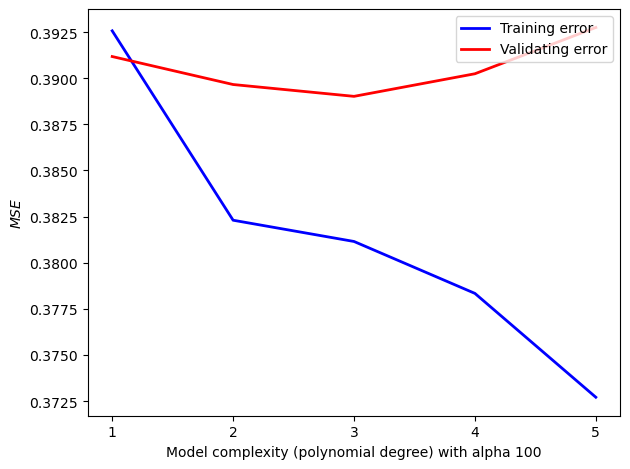

In [54]:
# Error curves of Ridge Classifier with alpha 100 in different degree
# The seleted model is with alpha 100 and degree 3
mse_train = []
mse_test = []

max_degree = 6

for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    
    ridge = RidgeClassifier(alpha=100, max_iter=500)
    ridge = ridge.fit(X_train_poly, y_train.values.ravel())

    y_train_pred = ridge.predict(X_train_poly)
    y_valid_pred = ridge.predict(X_valid_poly)
    
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_valid, y_valid_pred))
    

plt.plot(range(1, max_degree), mse_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), mse_test, label = 'Validating error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree) with alpha 100')
plt.ylabel('$MSE$')
plt.tight_layout()
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show()

### **Choose best 3 features with Random Forest**

In [62]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=100, 
                                random_state=1,
                                n_jobs=2)

forest.fit(X_train, y_train.values.ravel())

y_pred = forest.predict(X_valid)
print('ACC train: %.4f, valid: %.4f\n' % (
                    accuracy_score(y_train, y_train_pred),
                    accuracy_score(y_valid, y_valid_pred)))

ACC train: 0.6273, valid: 0.6073



 1) GAME_CLOCK                     0.206141
 2) SHOT_DIST                      0.196920
 3) SHOT_CLOCK                     0.187393
 4) CLOSE_DEF_DIST                 0.168517
 5) TOUCH_TIME                     0.139893
 6) PERIOD                         0.048830
 7) DRIBBLES                       0.046413
 8) PTS_TYPE                       0.005893


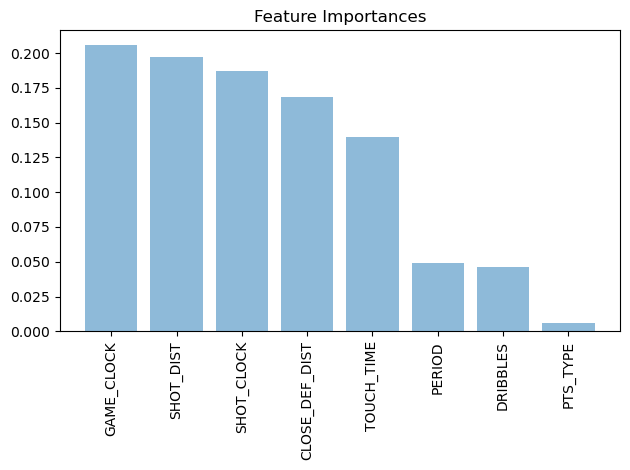

In [63]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.show()

In [65]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.175, prefit=True)
Z_forest = sfm.transform(X.values)

for f in range(Z_forest.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

 1) GAME_CLOCK                     0.206141
 2) SHOT_DIST                      0.196920
 3) SHOT_CLOCK                     0.187393


### **Train the selected model with the best 3 features**

In [67]:
sc = StandardScaler()
X_std = sc.fit_transform(Z_forest)

X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

ridge = RidgeClassifier(alpha=100, max_iter=500)
ridge = ridge.fit(X_train_poly, y_train.values.ravel())

y_train_pred = ridge.predict(X_train_poly)
y_valid_pred = ridge.predict(X_valid_poly)

print("Alpha:", a)
print('MSE train: %.4f, valid: %.4f' % (
                mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_valid, y_valid_pred)))
print('ACC train: %.4f, valid: %.4f\n' % (
                accuracy_score(y_train, y_train_pred),
                accuracy_score(y_valid, y_valid_pred)))

Alpha: 1000
MSE train: 0.3895, valid: 0.3951
ACC train: 0.6105, valid: 0.6049



### **Export Prediction**

In [73]:
X_test_forest = sfm.transform(X_test.values)

X_test_std = sc.fit_transform(X_test_forest)

X_test_poly = poly.transform(X_test_std)

y_test_pred = ridge.predict(X_test_poly)

print(y_test_pred.shape)

(36751, 1)


In [86]:
predict = []
for i in range(len(y_test_pred)):
    predict.append(int(y_test_pred[i]))
    
pd_predict = pd.DataFrame(predict, columns=["FGM"])
print(pd_predict)
pd_predict.to_csv("./data/y_test.csv", index=None)

       FGM
0        1
1        0
2        1
3        1
4        1
...    ...
36746    0
36747    0
36748    0
36749    0
36750    0

[36751 rows x 1 columns]
